## **1. setup_environmenth**

In [1]:
!pip install bs4
!pip install requests beautifulsoup4 pandas
!pip install selenium
!pip install webdriver-manager

In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.chrome.service import Service
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager

In [3]:
!apt update
!apt install -y wget unzip
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb
!apt --fix-broken install -y
!wget https://chromedriver.storage.googleapis.com/114.0.5735.90/chromedriver_linux64.zip
!unzip chromedriver_linux64.zip
!mv chromedriver /usr/bin/chromedriver


Hit:1 https://dl.google.com/linux/chrome/deb stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 257 kB in 2s (155 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
54 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skippi

In [4]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
service = Service(ChromeDriverManager().install())
chromeDriver = webdriver.Chrome(service=service, options=chrome_options)

In [5]:
chrome_options.binary_location = "/usr/bin/google-chrome"
service = Service("/usr/bin/chromedriver")


## **2. data_fetch**

In [6]:
url = ["https://statiz.sporki.com/stats/?m=main&m2=batting&m3=default&so=WAR&ob=DESC&year=2017&sy=2017&ey=&te=&po=&lt=10100&reg=R&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2=",
       "https://statiz.sporki.com/stats/?m=main&m2=batting&m3=default&so=WAR&ob=DESC&year=2018&sy=&ey=&te=&po=&lt=10100&reg=R&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2=",
       "https://statiz.sporki.com/stats/?m=main&m2=batting&m3=default&so=WAR&ob=DESC&year=2019&sy=&ey=&te=&po=&lt=10100&reg=R&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2=",
       "https://statiz.sporki.com/stats/?m=main&m2=batting&m3=default&so=WAR&ob=DESC&year=2020&sy=&ey=&te=&po=&lt=10100&reg=R&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2=",
       "https://statiz.sporki.com/stats/?m=main&m2=batting&m3=default&so=WAR&ob=DESC&year=2021&sy=&ey=&te=&po=&lt=10100&reg=R&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2=",
       "https://statiz.sporki.com/stats/?m=main&m2=batting&m3=default&so=WAR&ob=DESC&year=2022&sy=&ey=&te=&po=&lt=10100&reg=R&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2=",
       "https://statiz.sporki.com/stats/?m=main&m2=batting&m3=default&so=WAR&ob=DESC&year=2023&sy=&ey=&te=&po=&lt=10100&reg=R&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2="]


In [7]:
rows = []
for i in range(len(url)):
    chromeDriver.get(url[i])
    html = chromeDriver.page_source
    bsObject = BeautifulSoup(html, 'html.parser')
    temp = bsObject.find_all("table")[0]
    column = ["Rank", "Name", "Team", "WAR", "oWAR", "dWAR", "G", "PA", "ePA", "AB", "R", "H", "2B", "3B", "HR", "TB", "RBI", "SB", "CS", "BB", "HP", "IB", "SO", "GDP", "SH", "SF", "AVG", "OBP", "SLG", "OPS", "R/ePA", "wRC+",
    ]

    temp_len = len(temp.find_all("tr"))

    for i in range(2, temp_len):
        tempTr = temp.find_all("tr")[i]

        if tempTr.find("th") is not None:
            continue

        tds = tempTr.find_all("td")


        row = {col: tds[idx].text.strip() for idx, col in enumerate(column)}

        rows.append(row)

df = pd.DataFrame(rows)

In [8]:
df_raw = df

## **3. preprocessing**

In [9]:
df.info() # 결측치 X -> 결측치 전처리 안함
df = df.drop(columns=['Rank','Name', 'Team'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    347 non-null    object
 1   Name    347 non-null    object
 2   Team    347 non-null    object
 3   WAR     347 non-null    object
 4   oWAR    347 non-null    object
 5   dWAR    347 non-null    object
 6   G       347 non-null    object
 7   PA      347 non-null    object
 8   ePA     347 non-null    object
 9   AB      347 non-null    object
 10  R       347 non-null    object
 11  H       347 non-null    object
 12  2B      347 non-null    object
 13  3B      347 non-null    object
 14  HR      347 non-null    object
 15  TB      347 non-null    object
 16  RBI     347 non-null    object
 17  SB      347 non-null    object
 18  CS      347 non-null    object
 19  BB      347 non-null    object
 20  HP      347 non-null    object
 21  IB      347 non-null    object
 22  SO      347 non-null    ob

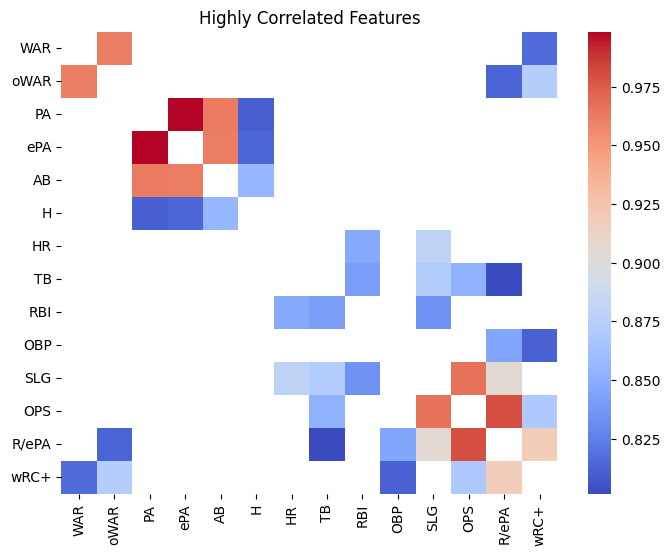

In [10]:
# 상관 행렬 및 히트맵
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()
# 상관관계 임계값 설정
threshold = 0.8
high_corr_vars = correlation_matrix[
    (correlation_matrix.abs() >= threshold) & (correlation_matrix != 1)
].dropna(how='all', axis=0).dropna(how='all', axis=1)

# 상관관계가 높은 변수들만 히트맵으로 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(high_corr_vars, annot=False, cmap='coolwarm')
plt.title("Highly Correlated Features")
plt.show()

In [11]:
df = df.drop(columns=['oWAR','PA', 'AB', 'R/ePA', 'SLG'])

In [12]:
df['Golden'] = 0
idx=[19, 20, 12, 1, 7, 11, 6, 3, 17, 48, 47, 57, 70, 59, 63, 54, 64, 98, 99, 105, 100, 97, 102, 101, 109, 103, 149, 153, 154, 155, 148, 160, 147, 152, 150, 211, 198, 205, 199, 210, 204, 200, 197, 201, 252, 256, 255, 254, 250, 248, 247, 249, 245, 299, 304, 300, 298, 303, 301, 311, 297, 306]
# 골든글러브 받은 사람
for x in idx:
    df.loc[x,'Golden'] = 1

## **4. model_training**

In [13]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# 데이터 로드
data=df
print(data)
X = data.drop(columns=['Golden'])  # Golden 열과 불필요한 인덱스 열 제거
y = data['Golden']  # 타겟 변수

# K-Fold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5개의 폴드로 분할



for train_index, test_index in kf.split(X):
    # 데이터 분할
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # SMOTE 적용
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # 모델 학습
    model = LogisticRegression(max_iter=1000, random_state=42, C = 0.01)
    model.fit(X_train_resampled, y_train_resampled)

    # 예측
    y_pred = model.predict(X_test)


# 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


      WAR   dWAR    G  ePA    R    H  2B 3B  HR   TB  ...  IB   SO GDP  SH SF  \
0    6.98  -0.35  144  628  110  185  34  2  35  328  ...  10  123   8   0  4   
1    6.37   0.55  130  520   89  136  18  1  46  294  ...  10  107   8   0  8   
2    5.94  -0.23  131  537   91  177  40  2  20  281  ...   2   64  15   5  4   
3    5.94  -0.41  142  623   98  176  36  3  26  296  ...   8   82  15   0  8   
4    5.77   0.61  141  597   90  159  36  3  23  270  ...   2   65   8   2  7   
..    ...    ...  ...  ...  ...  ...  .. ..  ..  ...  ...  ..  ...  ..  .. ..   
342  0.64  -0.96  139  605   66  159  28  1  16  237  ...   5   69  20   0  2   
343  0.63  -0.23  109  471   62  119  10  6   3  150  ...   0   84   5   8  3   
344  0.44  -0.36  132  481   40   89  15  0  10  134  ...   4  100   8   0  2   
345  0.39  -0.62  132  511   63  122  11  1   2  141  ...   1   73  12  10  5   
346  0.10  -0.63  129  441   53  102  24  0   3  135  ...   1  112   6  12  5   

       AVG    OBP    OPS   

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

Accuracy: 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89        56
           1       0.55      0.92      0.69        13

    accuracy                           0.84        69
   macro avg       0.76      0.87      0.79        69
weighted avg       0.90      0.84      0.85        69



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **5. generate_predictions**

In [14]:
url = ["https://statiz.sporki.com/stats/?m=main&m2=batting&m3=default&so=WAR&ob=DESC&year=2024&sy=&ey=&te=&po=2&lt=10100&reg=R&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2=",
       "https://statiz.sporki.com/stats/?m=main&m2=batting&m3=default&so=WAR&ob=DESC&year=2024&sy=&ey=&te=&po=3&lt=10100&reg=R&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2=",
       "https://statiz.sporki.com/stats/?m=main&m2=batting&m3=default&so=WAR&ob=DESC&year=2024&sy=&ey=&te=&po=4&lt=10100&reg=R&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2=",
       "https://statiz.sporki.com/stats/?m=main&m2=batting&m3=default&so=WAR&ob=DESC&year=2024&sy=&ey=&te=&po=5&lt=10100&reg=R&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2=",
       "https://statiz.sporki.com/stats/?m=main&m2=batting&m3=default&so=WAR&ob=DESC&year=2024&sy=&ey=&te=&po=6&lt=10100&reg=R&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2=",
       "https://statiz.sporki.com/stats/?m=main&m2=batting&m3=default&so=WAR&ob=DESC&year=2024&sy=&ey=&te=&po=7&lt=10100&reg=R&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2=",
       "https://statiz.sporki.com/stats/?m=main&m2=batting&m3=default&so=WAR&ob=DESC&year=2024&sy=&ey=&te=&po=8&lt=10100&reg=R&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2=",
       "https://statiz.sporki.com/stats/?m=main&m2=batting&m3=default&so=WAR&ob=DESC&year=2024&sy=&ey=&te=&po=9&lt=10100&reg=R&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2=",
       "https://statiz.sporki.com/stats/?m=main&m2=batting&m3=default&so=WAR&ob=DESC&year=2024&sy=&ey=&te=&po=10&lt=10100&reg=R&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2="
]

In [15]:
position = ["포수","1루수","2루수","3루수","유격수","좌익수","중견수","우익수","지명타자"]
for i in range(len(url)):
    rows = []
    chromeDriver.get(url[i])
    html = chromeDriver.page_source
    bsObject = BeautifulSoup(html, 'html.parser')
    temp = bsObject.find_all("table")[0]
    column = ["Rank", "Name", "Team", "WAR", "oWAR", "dWAR", "G", "PA", "ePA", "AB", "R", "H", "2B", "3B", "HR", "TB", "RBI", "SB", "CS", "BB", "HP", "IB", "SO", "GDP", "SH", "SF", "AVG", "OBP", "SLG", "OPS", "R/ePA", "wRC+",
    ]

    temp_len = len(temp.find_all("tr"))

    for j in range(2, temp_len):
        tempTr = temp.find_all("tr")[j]

        if tempTr.find("th") is not None:
            continue

        tds = tempTr.find_all("td")


        row = {col: tds[idx].text.strip() for idx, col in enumerate(column)}

        rows.append(row)

    df_raw = pd.DataFrame(rows)
    df = df_raw
    df = df.drop(columns=['Rank','Name', 'Team'])
    df = df.drop(columns=['oWAR','PA', 'AB', 'R/ePA', 'SLG'])

    # 예측 확률 계산\
    predictions_proba = model.predict_proba(df)

    # 확률이 높은 클래스 (1)의 확률 가져오기
    df['Golden_Probability'] = predictions_proba[:, 1]

    # 가장 높은 확률을 가진 선수 선정
    top_candidate_idx = df['Golden_Probability'].idxmax()

    # 결과 출력
    print("2024년 골든글러브 예측 확률이 가장 높은 " + position[i])
    print(df_raw.iloc[top_candidate_idx][1])


2024년 골든글러브 예측 확률이 가장 높은 포수
양의지


<ipython-input-15-5f17086d1821>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df_raw.iloc[top_candidate_idx][1])


2024년 골든글러브 예측 확률이 가장 높은 1루수
오스틴


<ipython-input-15-5f17086d1821>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df_raw.iloc[top_candidate_idx][1])


2024년 골든글러브 예측 확률이 가장 높은 2루수
김혜성


<ipython-input-15-5f17086d1821>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df_raw.iloc[top_candidate_idx][1])


2024년 골든글러브 예측 확률이 가장 높은 3루수
김도영


<ipython-input-15-5f17086d1821>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df_raw.iloc[top_candidate_idx][1])


2024년 골든글러브 예측 확률이 가장 높은 유격수
박찬호


<ipython-input-15-5f17086d1821>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df_raw.iloc[top_candidate_idx][1])


2024년 골든글러브 예측 확률이 가장 높은 좌익수
구자욱


<ipython-input-15-5f17086d1821>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df_raw.iloc[top_candidate_idx][1])


2024년 골든글러브 예측 확률이 가장 높은 중견수
김지찬


<ipython-input-15-5f17086d1821>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df_raw.iloc[top_candidate_idx][1])


2024년 골든글러브 예측 확률이 가장 높은 우익수
로하스


<ipython-input-15-5f17086d1821>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df_raw.iloc[top_candidate_idx][1])


2024년 골든글러브 예측 확률이 가장 높은 지명타자
전준우


<ipython-input-15-5f17086d1821>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df_raw.iloc[top_candidate_idx][1])


## **6. result_analysis**

In [16]:

# 모델 학습 후, feature importance 분석
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.coef_[0])  # 회귀 계수의 절대값
})

# 중요도를 기준으로 정렬
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# 결과 출력
print("Feature Importance:")
print(feature_importance)


Feature Importance:
   Feature  Importance
0      WAR    0.397137
17     GDP    0.102670
19      SF    0.083966
1     dWAR    0.072173
23    wRC+    0.067372
18      SH    0.064218
11      SB    0.063033
6       2B    0.058923
15      IB    0.047173
14      HP    0.040309
2        G    0.037180
7       3B    0.027441
5        H    0.019842
16      SO    0.018894
13      BB    0.018830
12      CS    0.015956
9       TB    0.004330
3      ePA    0.004192
8       HR    0.003824
4        R    0.003677
10     RBI    0.001877
22     OPS    0.000314
21     OBP    0.000197
20     AVG    0.000097
